In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing data set

In [85]:
df=pd.read_csv('Grades.csv')

In [86]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


we can observe that data looks like ordinal data(maintain the order by grades wise) need to convert into numerical data.

In [87]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [89]:
#checking null values
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

There is alot of missing values  in most of  columns espically more in CS-406,CS-412 

Handling missing values

In [90]:
#checking the list of counts of target
df.nunique().to_frame("no of unique values")

,no of unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


In [91]:
df["CS-412"].mode()

0    A-
Name: CS-412, dtype: object

In [92]:
df["CS-406"].mode()

0    A-
Name: CS-406, dtype: object

In [93]:
#filling null values by using fillna method
df['CS-412']=df['CS-412'].fillna('A-')
df['CS-406']=df['CS-406'].fillna('A-')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [94]:
#dropping the remaing missing values by using dropna method
df.dropna(axis=0,inplace=True)

In [95]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


# Encoding -- coverting object data into numerical ones by using datamapping

In [97]:
print(df["PH-121"].value_counts())
print(df["CS-406"].value_counts())

A-    112
A     110
B+     61
B      57
B-     54
D      40
C      32
C+     30
A+     22
D+     21
C-     18
Name: PH-121, dtype: int64
A-    250
A      79
B+     63
B      58
B-     22
C+     22
C      19
D+     14
C-      8
A+      8
F       6
D       5
W       3
Name: CS-406, dtype: int64


#encoding using replace method
df.replace({'PH-121':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'HS-101':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CY-105':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'HS-105/12':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'MT-111':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-105':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-106':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'EL-102':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'EE-119':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'ME-107':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-107':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'HS-205/20':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'MT-222':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'EE-222':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'MT-224':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-210':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-211':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-203':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-214':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'EE-217':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-212':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-215':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'MT-331':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'EF-303':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'HS-304':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-301':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-302':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'TC-383':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'MT-442':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'EL-332':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-318':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-306':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-312':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-317':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-403':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-421':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-406':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-414':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-419':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-423':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})
df.replace({'CS-412':{'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}})


In [98]:
df.drop("Seat No.", axis='columns',inplace=True)

In [99]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

DATA MAPPING

In [100]:
datamapping={'A+':13,'A':12,'A-':11,'B+':10,'B':9,'B-':8,'C+':7,'C':6,'C-':5,'D+':4,'D':3,'D-':2,'W':1,'F':0}

In [101]:
df['PH-121']=df['PH-121'].map(datamapping)
df['HS-101']=df['HS-101'].map(datamapping)
df['CY-105']=df['CY-105'].map(datamapping)
df['MT-111']=df['MT-111'].map(datamapping)
df['HS-105/12']=df['HS-105/12'].map(datamapping)
df['CS-105']=df['CS-105'].map(datamapping)
df['CS-106']=df['CS-106'].map(datamapping)
df['EL-102']=df['EL-102'].map(datamapping)
df['EE-119']=df['EE-119'].map(datamapping)
df['ME-107']=df['ME-107'].map(datamapping)
df['CS-107']=df['CS-107'].map(datamapping)
df['HS-205/20']=df['HS-205/20'].map(datamapping)
df['MT-222']=df['MT-222'].map(datamapping)
df['EE-222']=df['EE-222'].map(datamapping)
df['MT-224']=df['MT-224'].map(datamapping)
df['CS-210']=df['CS-210'].map(datamapping)
df['CS-211']=df['CS-211'].map(datamapping)
df['CS-203']=df['CS-203'].map(datamapping)
df['EE-217']=df['EE-217'].map(datamapping)
df['CS-214']=df['CS-214'].map(datamapping)
df['MT-222']=df['MT-222'].map(datamapping)
df['CS-212']=df['CS-212'].map(datamapping)
df['CS-215']=df['CS-215'].map(datamapping)
df['MT-331']=df['MT-331'].map(datamapping)
df['EF-303']=df['EF-303'].map(datamapping)
df['HS-304']=df['HS-304'].map(datamapping)
df['CS-301']=df['CS-301'].map(datamapping)
df['CS-302']=df['CS-302'].map(datamapping)
df['TC-383']=df['TC-383'].map(datamapping)
df['MT-442']=df['MT-442'].map(datamapping)
df['EL-332']=df['EL-332'].map(datamapping)
df['MT-331']=df['MT-331'].map(datamapping)
df['EL-332']=df['EL-332'].map(datamapping)
df['CS-318']=df['CS-318'].map(datamapping)
df['CS-306']=df['CS-306'].map(datamapping)
df['CS-312']=df['CS-312'].map(datamapping)
df['CS-317']=df['CS-317'].map(datamapping)
df['CS-403']=df['CS-403'].map(datamapping)
df['CS-421']=df['CS-421'].map(datamapping)
df['CS-406']=df['CS-406'].map(datamapping)
df['CS-414']=df['CS-414'].map(datamapping)
df['CS-419']=df['CS-419'].map(datamapping)
df['CS-423']=df['CS-423'].map(datamapping)
df['CS-412']=df['CS-412'].map(datamapping)
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,8,4,5,6,5,4,3,5,8,5,...,5,5,5,5,11,12,5,9,11,2.205
1,12,3,4,3,8,6,3,12,4,3,...,4,3,6,3,11,8,6,6,9,2.008
2,12,9,12,8,10,12,8,10,11,11,...,9,9,12,6,12,12,12,11,12,3.608
3,3,7,4,3,3,11,4,5,3,7,...,4,6,4,5,8,9,7,7,7,1.906
4,11,11,11,10,12,12,11,10,12,11,...,8,10,10,8,11,12,11,11,12,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,9,12,12,11,13,12,11,11,13,10,...,11,11,12,12,12,10,10,9,12,3.798
567,13,12,12,12,12,12,12,11,12,12,...,10,10,12,12,11,9,11,6,11,3.772
568,9,12,11,10,12,12,12,12,12,9,...,11,9,12,10,12,6,10,11,11,3.470
569,12,10,3,12,3,4,8,5,8,5,...,3,9,9,5,3,6,9,8,6,2.193


In [102]:
#checking null values
df.isnull().sum()

PH-121         0
HS-101         0
CY-105         0
HS-105/12      0
MT-111         0
CS-105         0
CS-106         0
EL-102         0
EE-119         0
ME-107         0
CS-107         0
HS-205/20      0
MT-222       557
EE-222         0
MT-224         0
CS-210         0
CS-211         0
CS-203         0
CS-214         0
EE-217         0
CS-212         0
CS-215         0
MT-331       557
EF-303         1
HS-304         2
CS-301         0
CS-302         0
TC-383         0
MT-442         0
EL-332       557
CS-318         5
CS-306         0
CS-312         0
CS-317         0
CS-403         0
CS-421         0
CS-406         0
CS-414         0
CS-419         0
CS-423         0
CS-412         0
CGPA           0
dtype: int64

In [103]:
print(df["EF-303"].value_counts())
print(df["HS-304"].value_counts())
print(df["CS-318"].value_counts())

9.0     112
8.0      92
6.0      61
7.0      58
10.0     58
5.0      55
4.0      47
11.0     38
3.0      19
12.0     14
0.0       2
Name: EF-303, dtype: int64
11.0    128
9.0      72
8.0      70
10.0     65
6.0      58
7.0      53
5.0      33
12.0     28
3.0      19
4.0      18
0.0       5
13.0      4
1.0       2
Name: HS-304, dtype: int64
11.0    89
8.0     69
9.0     68
10.0    64
6.0     53
7.0     49
12.0    42
5.0     39
3.0     35
4.0     28
0.0     10
13.0     6
Name: CS-318, dtype: int64


In [104]:
#filling null values by using fillna method
df['EF-303']=df['EF-303'].fillna('9.0')
df['HS-304']=df['HS-304'].fillna('11.0')
df['CS-318']=df['CS-318'].fillna('11.0')

In [106]:
#checking null values
df.isnull().sum()

PH-121         0
HS-101         0
CY-105         0
HS-105/12      0
MT-111         0
CS-105         0
CS-106         0
EL-102         0
EE-119         0
ME-107         0
CS-107         0
HS-205/20      0
MT-222       557
EE-222         0
MT-224         0
CS-210         0
CS-211         0
CS-203         0
CS-214         0
EE-217         0
CS-212         0
CS-215         0
MT-331       557
EF-303         0
HS-304         0
CS-301         0
CS-302         0
TC-383         0
MT-442         0
EL-332       557
CS-318         0
CS-306         0
CS-312         0
CS-317         0
CS-403         0
CS-421         0
CS-406         0
CS-414         0
CS-419         0
CS-423         0
CS-412         0
CGPA           0
dtype: int64

In [107]:
df.dtypes

PH-121         int64
HS-101         int64
CY-105         int64
HS-105/12      int64
MT-111         int64
CS-105         int64
CS-106         int64
EL-102         int64
EE-119         int64
ME-107         int64
CS-107         int64
HS-205/20      int64
MT-222       float64
EE-222         int64
MT-224         int64
CS-210         int64
CS-211         int64
CS-203         int64
CS-214         int64
EE-217         int64
CS-212         int64
CS-215         int64
MT-331       float64
EF-303        object
HS-304        object
CS-301         int64
CS-302         int64
TC-383         int64
MT-442         int64
EL-332       float64
CS-318        object
CS-306         int64
CS-312         int64
CS-317         int64
CS-403         int64
CS-421         int64
CS-406         int64
CS-414         int64
CS-419         int64
CS-423         int64
CS-412         int64
CGPA         float64
dtype: object

In [108]:
df.drop(['EL-332', 'MT-331','MT-222'], axis=1,inplace=True)#dropping the columns having nan

In [109]:
df.shape

(557, 39)

In [110]:
#checking null values
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [111]:
#checking the list of counts of target
df.nunique().to_frame("no of unique values")

,no of unique values
PH-121,11
HS-101,11
CY-105,11
HS-105/12,11
MT-111,11
CS-105,11
CS-106,11
EL-102,11
EE-119,11
ME-107,11


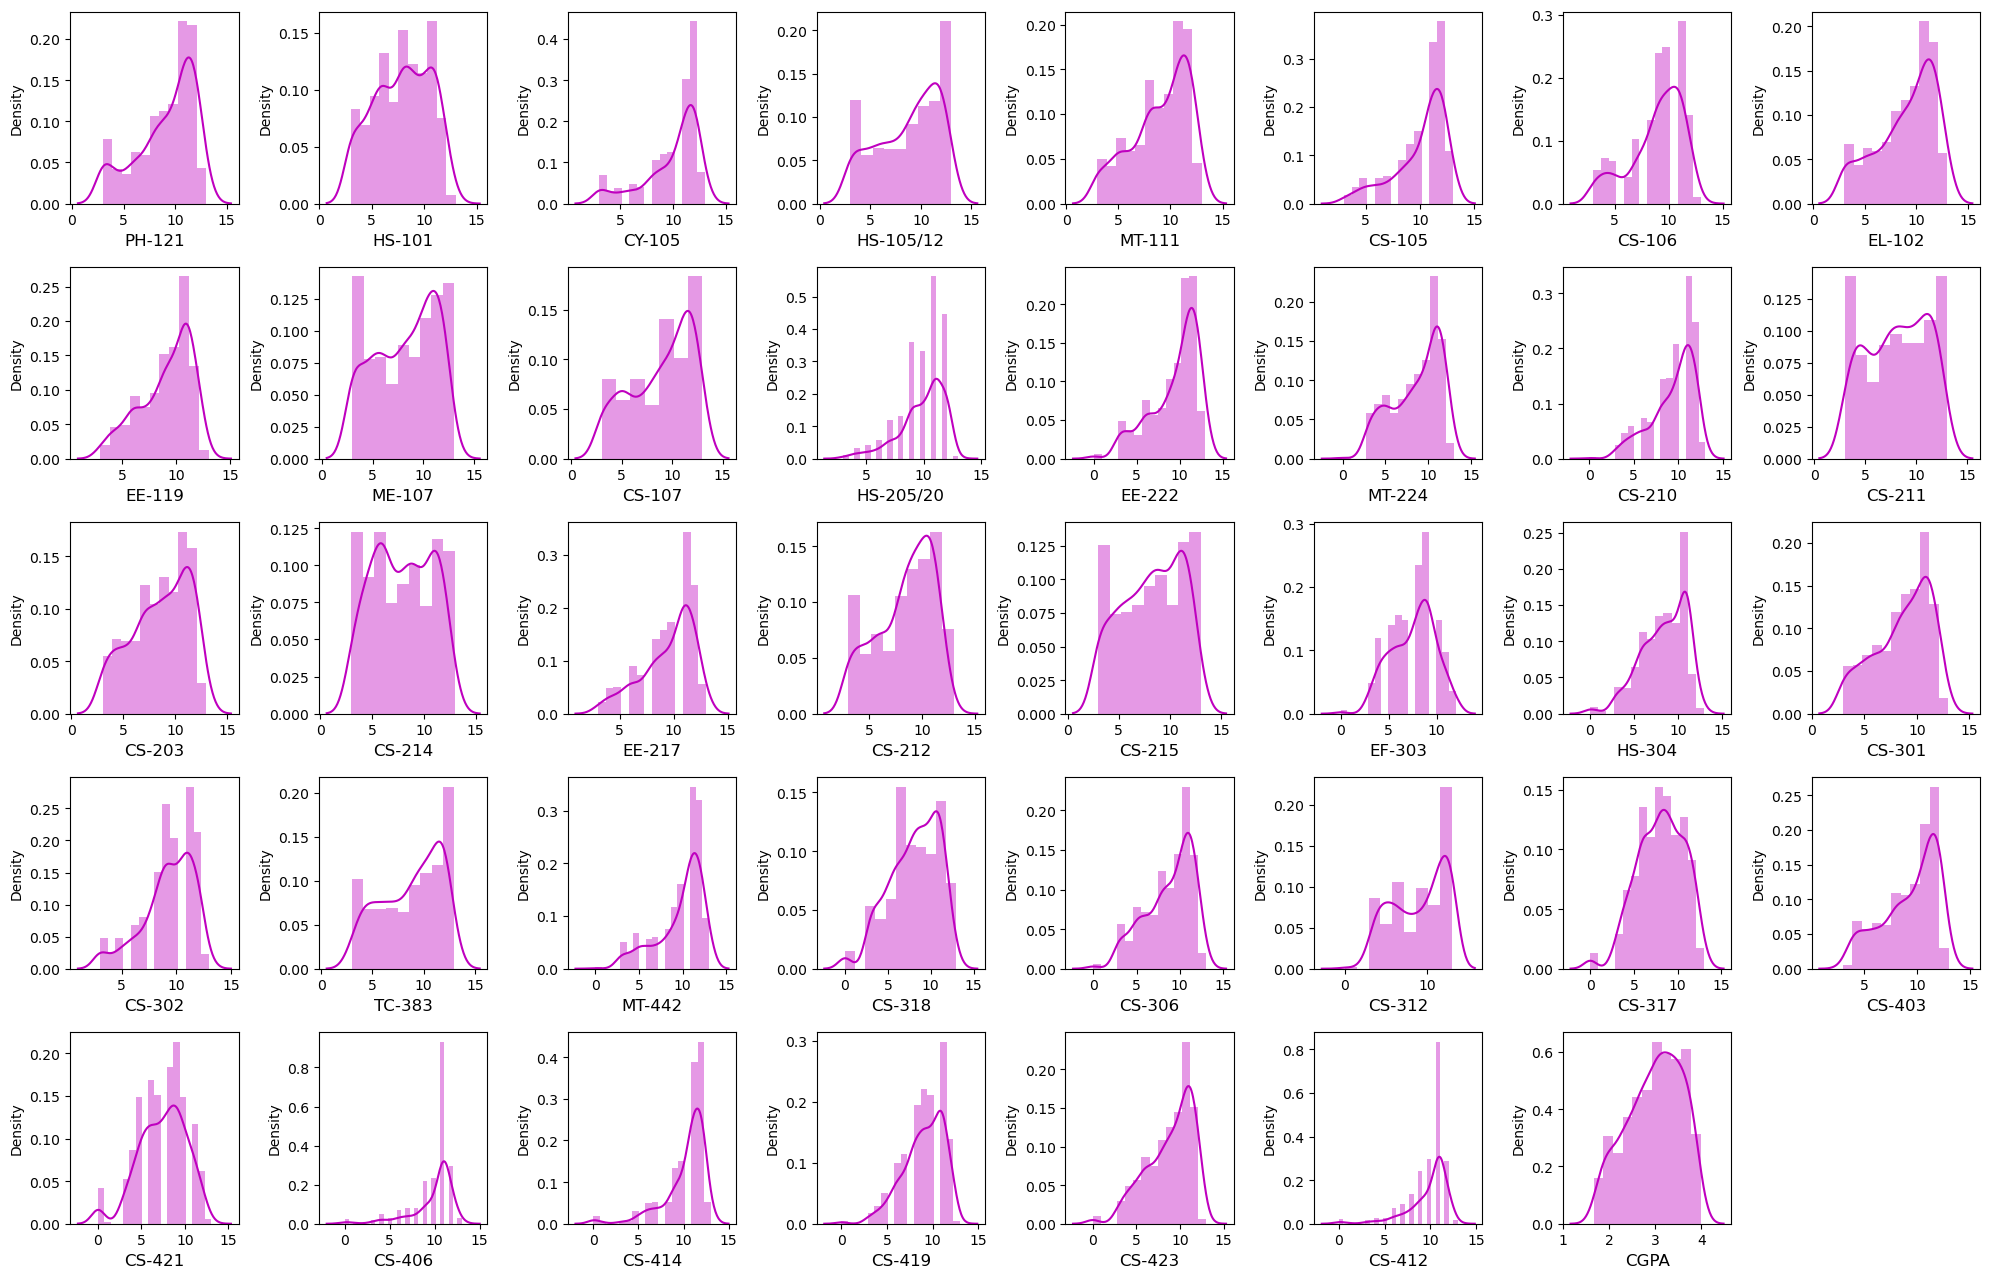

In [112]:
plt.figure(figsize=(20,15), facecolor= "white")
plotnumber = 1#iteration or index value
for col in df:
    if plotnumber<=42:
        ax=plt.subplot(6,8, plotnumber)#subplot is used to plot diff plot on single image
        sns.distplot(df[col], color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()   

checking the correlation

In [113]:
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.386438,0.604809,0.538438,0.472798,0.645120,0.278549,0.401432,0.651003,0.558797,...,0.037396,0.512664,0.385375,0.386229,0.330909,0.221540,0.500726,0.128416,0.285390,0.653422
HS-101,0.386438,1.000000,0.348273,0.490628,0.458901,0.422498,0.358549,0.369818,0.303700,0.353147,...,0.252377,0.416948,0.270980,0.361248,0.341352,0.288668,0.306006,0.267256,0.270728,0.552057
CY-105,0.604809,0.348273,1.000000,0.554667,0.551656,0.595151,0.366700,0.450469,0.551044,0.464895,...,0.289553,0.520673,0.556665,0.436718,0.201526,0.105625,0.509400,0.170993,0.076520,0.666772
HS-105/12,0.538438,0.490628,0.554667,1.000000,0.508817,0.529639,0.524372,0.355053,0.456886,0.362373,...,0.313504,0.527698,0.537481,0.477799,0.235799,0.165779,0.517935,0.276647,0.177124,0.656773
MT-111,0.472798,0.458901,0.551656,0.508817,1.000000,0.404631,0.535376,0.553925,0.432152,0.482117,...,0.541699,0.602586,0.484757,0.588343,0.335739,0.285540,0.568285,0.441691,0.308452,0.763055
CS-105,0.645120,0.422498,0.595151,0.529639,0.404631,1.000000,0.280605,0.338055,0.575898,0.472424,...,0.071708,0.427551,0.338465,0.330135,0.301322,0.193420,0.384435,0.096985,0.207915,0.604869
CS-106,0.278549,0.358549,0.366700,0.524372,0.535376,0.280605,1.000000,0.323869,0.293247,0.319149,...,0.537599,0.438915,0.527857,0.458537,0.175491,0.139845,0.502969,0.405745,0.189176,0.582142
EL-102,0.401432,0.369818,0.450469,0.355053,0.553925,0.338055,0.323869,1.000000,0.434623,0.458429,...,0.384630,0.489919,0.357365,0.416671,0.309630,0.324914,0.401470,0.408591,0.288105,0.658113
EE-119,0.651003,0.303700,0.551044,0.456886,0.432152,0.575898,0.293247,0.434623,1.000000,0.592024,...,0.176926,0.488328,0.410033,0.424877,0.320234,0.257977,0.511824,0.265528,0.313470,0.665495
ME-107,0.558797,0.353147,0.464895,0.362373,0.482117,0.472424,0.319149,0.458429,0.592024,1.000000,...,0.239689,0.500030,0.382091,0.439754,0.344915,0.208071,0.499017,0.263936,0.288580,0.677596


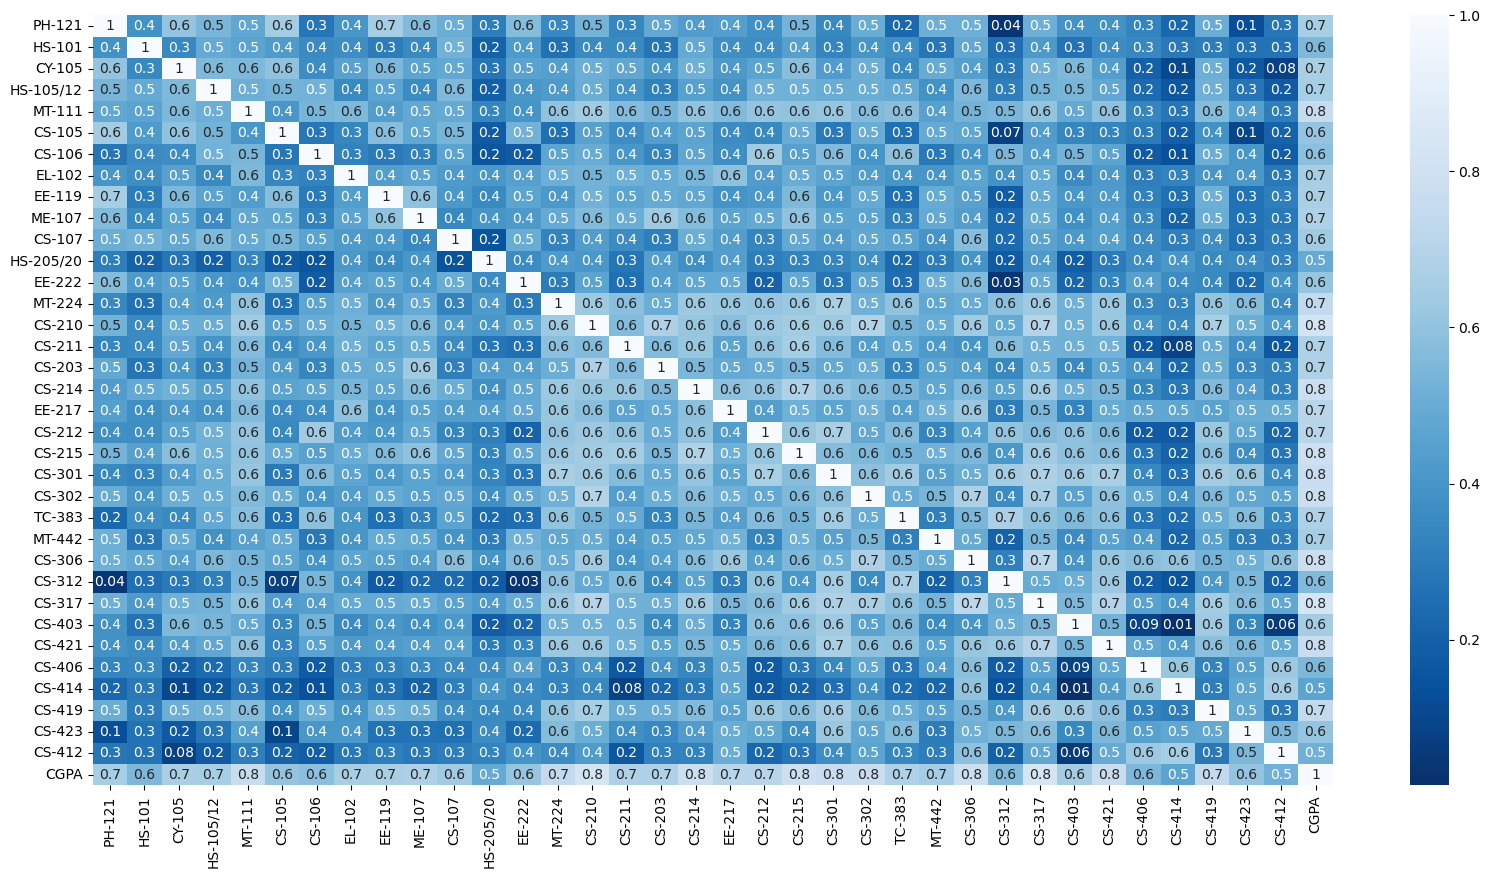

In [114]:
#by using heatmap we can also visuilaze the correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),fmt='.1g', linecolor="black", annot=True, cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

seems like there is a multicollinearity exists between the columns by checking the Vif we can decide

sepertaing features and labels

In [116]:
x=df.drop("CGPA", axis=1)
y=df["CGPA"]

print("Feature dimensin--", x.shape)
print("label dimension--", y.shape)

Feature dimensin-- (557, 38)
label dimension-- (557,)


Scaling is not required all the datapoints are in same scale

MODELLING

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=20)

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [121]:
models=[LinearRegression(),DecisionTreeRegressor(),KNN(),RandomForestRegressor(),
        GradientBoostingRegressor(),SVR()]

In [122]:
def r2score_train_test():
    
    for model in models:
        model.fit(x_train,y_train)
        y_train_pred = model.predict(x_train)
        y_test_pred =model.predict(x_test)
        
        
    
        print(model)
        print('r2 Score for the training',  '=', r2_score(y_train,y_train_pred)*100)
        print('r2 Score for the testing', '=',  r2_score(y_test,y_test_pred)*100)
        print('Mean Absolute Error:',  '=',  mean_absolute_error(y_test,y_test_pred))
        print('Mean squared Error:', '=',  mean_squared_error(y_test,y_test_pred))
        print('Root Mean square Error:', '=',   np.sqrt(mean_squared_error(y_test,y_test_pred))) 
        print('-'*30)  
        print("\n")
              

In [123]:
r2score_train_test()

LinearRegression()
r2 Score for the training = 99.5115218735089
r2 Score for the testing = 99.60981243602097
Mean Absolute Error: = 0.029001942578725612
Mean squared Error: = 0.0014756688467303918
Root Mean square Error: = 0.038414435395179136
------------------------------


DecisionTreeRegressor()
r2 Score for the training = 100.0
r2 Score for the testing = 87.13690688900701
Mean Absolute Error: = 0.17030357142857144
Mean squared Error: = 0.04864754166666666
Root Mean square Error: = 0.22056187718340325
------------------------------


KNeighborsRegressor()
r2 Score for the training = 97.52312959823617
r2 Score for the testing = 96.41605407661675
Mean Absolute Error: = 0.0900916666666667
Mean squared Error: = 0.013554295000000004
Root Mean square Error: = 0.11642291441121032
------------------------------


RandomForestRegressor()
r2 Score for the training = 99.278452989903
r2 Score for the testing = 96.48539690064594
Mean Absolute Error: = 0.08822517857142842
Mean squared Error: = 0

In [124]:
from sklearn.model_selection import cross_val_score

In [125]:
def compare_models_cross_validation():
    
    for model in models:
        
        cv_score = cross_val_score(model, x, y, cv=5)
        r2_accuracy = sum(cv_score)/len(cv_score)
        r2_accuracy = r2_accuracy*100
        
        
        print('Cross Validation Score for the', model, '=', cv_score)
        print('r2 Accuracy  of the', model, '=', r2_accuracy,'%')
        print('-'*30) 
        print("\n") 

In [126]:
compare_models_cross_validation()

Cross Validation Score for the LinearRegression() = [0.99373518 0.99498841 0.99358874 0.99174391 0.99446351]
r2 Accuracy  of the LinearRegression() = 99.37039498974937 %
------------------------------


Cross Validation Score for the DecisionTreeRegressor() = [0.85185562 0.79848376 0.81044076 0.80780777 0.81149834]
r2 Accuracy  of the DecisionTreeRegressor() = 81.60172510971823 %
------------------------------


Cross Validation Score for the KNeighborsRegressor() = [0.9794994  0.96512824 0.95917771 0.96593621 0.94924343]
r2 Accuracy  of the KNeighborsRegressor() = 96.37969981230586 %
------------------------------


Cross Validation Score for the RandomForestRegressor() = [0.95510411 0.95446187 0.96014948 0.93498782 0.93363665]
r2 Accuracy  of the RandomForestRegressor() = 94.76679866003657 %
------------------------------


Cross Validation Score for the GradientBoostingRegressor() = [0.96419635 0.96747083 0.964004   0.95972514 0.96315271]
r2 Accuracy  of the GradientBoostingRegresso

Model selection¶

In [127]:
#difference between models and cross validation score
print("Diff between r2_score and cross_validation score  for LinearRegression is =",  99.60 -99.37)
print("Diff between r2_score and cross_validation score  for DecisionTreeRegressor is =",   87.13 -81.60)
print("Diff between r2_score and cross_validation score  for KNeighborsRegressor is =",  96.41 -96.37)
print("Diff between r2_score and cross_validation score  for RandomForestRegressor is =",  96.48 -94.76)
print("Diff between r2_score and cross_validation score  for GradientBoostingRegressor is =",  97.69-96.37)
print("Diff between r2_score and cross_validation score  for SVR is =", 97.90 -97.04)

Diff between r2_score and cross_validation score  for LinearRegression is = 0.22999999999998977
Diff between r2_score and cross_validation score  for DecisionTreeRegressor is = 5.530000000000001
Diff between r2_score and cross_validation score  for KNeighborsRegressor is = 0.03999999999999204
Diff between r2_score and cross_validation score  for RandomForestRegressor is = 1.7199999999999989
Diff between r2_score and cross_validation score  for GradientBoostingRegressor is = 1.3199999999999932
Diff between r2_score and cross_validation score  for SVR is = 0.8599999999999994


from the above KNeighborsRegressor is the best model

# HYPER PARAMETER TUNING

In [128]:
from sklearn.model_selection import RandomizedSearchCV

parameters ={
             'n_neighbors': [5,7,9,11],
              'weights' :['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[20,30,40],
              'p':[float,2],
               'metric':['str' ,'minkowski'],
               'n_jobs':[None,-1]
             }

In [130]:
RCV=RandomizedSearchCV(KNN(),parameters,cv=5,verbose=2)

In [131]:
RCV.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END algorithm=kd_tree, leaf_size=40, metric=str, n_jobs=None, n_neighbors=7, p=<class 'float'>, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=40, metric=str, n_jobs=None, n_neighbors=7, p=<class 'float'>, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=40, metric=str, n_jobs=None, n_neighbors=7, p=<class 'float'>, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=40, metric=str, n_jobs=None, n_neighbors=7, p=<class 'float'>, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=40, metric=str, n_jobs=None, n_neighbors=7, p=<class 'float'>, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=str, n_jobs=-1, n_neighbors=9, p=<class 'float'>, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=str, n_jobs=-1, n_neighbors=9, p=<class 'float'>, weights=uniform; tota

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [20, 30, 40],
                                        'metric': ['str', 'minkowski'],
                                        'n_jobs': [None, -1],
                                        'n_neighbors': [5, 7, 9, 11],
                                        'p': [<class 'float'>, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [132]:
RCV.best_params_

{'weights': 'distance',
 'p': 2,
 'n_neighbors': 11,
 'n_jobs': -1,
 'metric': 'minkowski',
 'leaf_size': 40,
 'algorithm': 'auto'}

In [136]:
best_model = KNN(weights='distance',p=2,n_neighbors=11,n_jobs=-1,metric='minkowski',leaf_size=40,algorithm='auto')
best_model.fit(x_train,y_train)
y_train_pred = best_model.predict(x_train)
y_test_pred =best_model.predict(x_test)
print(r2_score(y_test,y_test_pred)*100)

96.84538407035089


After performing hyperparameter tuning there is an increase in r2 score from '96.37 to '96.84

In [137]:
#saving model using .pkl
import joblib
joblib.dump(best_model ,"grades_prediction.pkl")

['grades_prediction.pkl']